In [ ]:
# m22ai608-q2-Rakesh Reddy Kadapala

In [ ]:
#blur them using: Gaussian blur  & Motion Blur

In [ ]:
#Gaussian blur-img1

In [2]:
#pip install opencv-python-headless


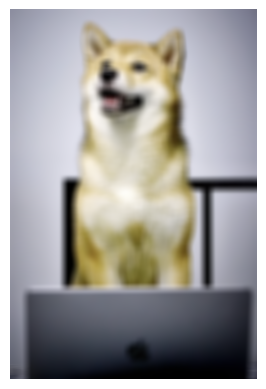

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img1.jpg'
image = cv2.imread(image_path)

# Apply Gaussian blur
k_size = (35, 35)
sigma_x = 30
sigma_y = 30
blurred_image = cv2.GaussianBlur(image, k_size, sigma_x, sigma_y)

# Display the blurred image using matplotlib
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis labels and ticks
plt.show()


In [ ]:
#img2

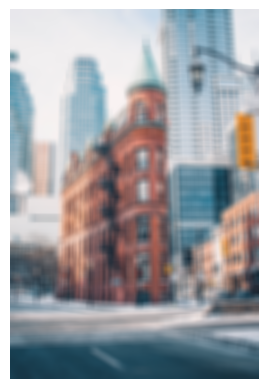

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img2.jpg'
image = cv2.imread(image_path)

# Apply Gaussian blur
k_size = (35, 35)
sigma_x = 30
sigma_y = 30
blurred_image = cv2.GaussianBlur(image, k_size, sigma_x, sigma_y)

# Display the blurred image using matplotlib
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis labels and ticks
plt.show()


In [12]:
#deblur-img2

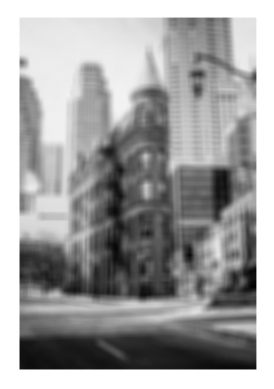

True

In [52]:
import cv2

# Load the noisy image
noisy_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\gaussian_blur_img2.png'
noisy_image = cv2.imread(noisy_image_path, cv2.IMREAD_GRAYSCALE)
import numpy as np
from scipy.fftpack import fft2, ifft2

# Compute the 2D FFT of the noisy image
noisy_fft = fft2(noisy_image)

# Calculate the PSD of the noisy image
psd = np.abs(noisy_fft) ** 2
# Estimate the noise variance (for Gaussian noise)
noise_variance = np.var(noisy_image)

# Calculate the Wiener filter
wiener_filter = np.conj(psd) / (psd + noise_variance)

# Apply Wiener deconvolution
deconvolved_fft = noisy_fft * wiener_filter

# Inverse FFT to get the denoised image
denoised_image = np.abs(ifft2(deconvolved_fft))

# Clip pixel values to the valid range (0-255)
denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)
import matplotlib.pyplot as plt

# Display the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()

# Save the denoised image
denoised_image_path = 'path_to_denoised_image2.jpg'
cv2.imwrite(denoised_image_path, denoised_image)


In [ ]:
#deblur-img1

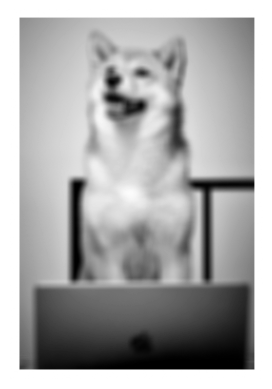

True

In [51]:
import cv2

# Load the noisy image
noisy_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\gaussian_blur_img1.png'
noisy_image = cv2.imread(noisy_image_path, cv2.IMREAD_GRAYSCALE)
import numpy as np
from scipy.fftpack import fft2, ifft2

# Compute the 2D FFT of the noisy image
noisy_fft = fft2(noisy_image)

# Calculate the PSD of the noisy image
psd = np.abs(noisy_fft) ** 2
# Estimate the noise variance (for Gaussian noise)
noise_variance = np.var(noisy_image)

# Calculate the Wiener filter
wiener_filter = np.conj(psd) / (psd + noise_variance)

# Apply Wiener deconvolution
deconvolved_fft = noisy_fft * wiener_filter

# Inverse FFT to get the denoised image
denoised_image = np.abs(ifft2(deconvolved_fft))

# Clip pixel values to the valid range (0-255)
denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)
import matplotlib.pyplot as plt

# Display the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()

# Save the denoised image
denoised_image_path = 'path_to_denoised_image.jpg'
cv2.imwrite(denoised_image_path, denoised_image)


In [ ]:
#motion blur

In [25]:
import cv2
import numpy as np

def apply_horizontal_motion_blur(input_image_path, output_image_path, kernel_size=30):
    # Load the image
    img = cv2.imread(input_image_path)

    # Create the horizontal kernel.
    kernel_h = np.zeros((kernel_size, kernel_size))

    # Fill the middle row with ones.
    kernel_h[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)

    # Normalize.
    kernel_h /= kernel_size

    # Apply the horizontal kernel for motion blur.
    horizontal_mb = cv2.filter2D(img, -1, kernel_h)

    # Save the output.
    cv2.imwrite(output_image_path, horizontal_mb)

input_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img1.jpg'
output_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img1_horizontal_blur.jpg'
apply_horizontal_motion_blur(input_image_path, output_image_path, kernel_size=30)


In [ ]:
#img2

In [24]:
import cv2
import numpy as np

def apply_horizontal_motion_blur(input_image_path, output_image_path, kernel_size=30):
    # Load the image
    img = cv2.imread(input_image_path)

    # Create the horizontal kernel.
    kernel_h = np.zeros((kernel_size, kernel_size))

    # Fill the middle row with ones.
    kernel_h[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)

    # Normalize.
    kernel_h /= kernel_size

    # Apply the horizontal kernel for motion blur.
    horizontal_mb = cv2.filter2D(img, -1, kernel_h)

    # Save the output.
    cv2.imwrite(output_image_path, horizontal_mb)


input_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img2.jpg'
output_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img2_horizontal_blur.jpg'
apply_horizontal_motion_blur(input_image_path, output_image_path, kernel_size=30)


In [ ]:
#Deblur -img1

In [32]:
import cv2
import numpy as np

def deblur_image(input_image_path, output_image_path, kernel_size=30, alpha=0.01):
    # Load the motion-blurred image
    img = cv2.imread(input_image_path)

    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create a kernel for deblurring (this assumes you know the kernel that caused the blur)
    kernel_h = np.zeros((kernel_size, kernel_size))
    kernel_h[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel_h /= kernel_size

    # Compute the Wiener filter using the known kernel and alpha value
    H = np.fft.fft2(kernel_h, s=img.shape)
    G = np.fft.fft2(img)
    F_hat = np.conj(H) / (np.abs(H) ** 2 + alpha)
    deblurred_img = np.abs(np.fft.ifft2(F_hat * G))

    # Clip pixel values to the valid range (0-255)
    deblurred_img = np.clip(deblurred_img, 0, 255).astype(np.uint8)

    # Save the deblurred output
    cv2.imwrite(output_image_path, deblurred_img)

input_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img1_horizontal_blur.jpg'
output_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img1_deblurred.jpg'
deblur_image(input_image_path, output_image_path, kernel_size=30, alpha=0.01)


In [ ]:
#Deblur -img2

In [33]:
import cv2
import numpy as np

def deblur_image(input_image_path, output_image_path, kernel_size=30, alpha=0.01):
    # Load the motion-blurred image
    img = cv2.imread(input_image_path)

    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create a kernel for deblurring (this assumes you know the kernel that caused the blur)
    kernel_h = np.zeros((kernel_size, kernel_size))
    kernel_h[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel_h /= kernel_size

    # Compute the Wiener filter using the known kernel and alpha value
    H = np.fft.fft2(kernel_h, s=img.shape)
    G = np.fft.fft2(img)
    F_hat = np.conj(H) / (np.abs(H) ** 2 + alpha)
    deblurred_img = np.abs(np.fft.ifft2(F_hat * G))

    # Clip pixel values to the valid range (0-255)
    deblurred_img = np.clip(deblurred_img, 0, 255).astype(np.uint8)

    # Save the deblurred output
    cv2.imwrite(output_image_path, deblurred_img)

input_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img2_horizontal_blur.jpg'
output_image_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\img2_deblurred.jpg'
deblur_image(input_image_path, output_image_path, kernel_size=30, alpha=0.01)
